In [1]:
import glob
import pandas as pd
from collections import defaultdict
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


From now on, we only focus on animal related requests. We have updated our data with an extra feature, the animal related to each request.

In [2]:
#read animal_cases.csv as df
df = pd.read_csv('Datasets/animal_cases.csv')

/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_4708/1177899459.py:2: DtypeWarning: Columns (13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets/animal_cases.csv')


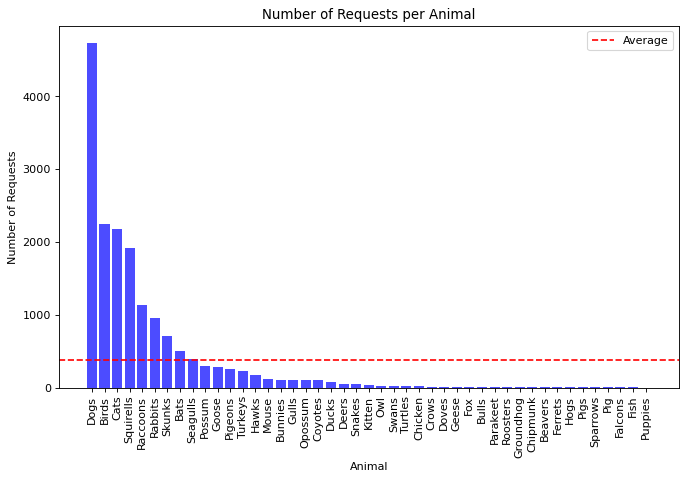

In [3]:
# get the number of each distinct animal in the dataset
animal_requests = df['animal'].value_counts()
# sort the dict and plot it. add a line wit the average number of requests
sorted_animal_requests = dict(sorted(animal_requests.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(sorted_animal_requests.keys(), sorted_animal_requests.values(), color='b', alpha=0.7)
plt.axhline(y=np.mean(list(sorted_animal_requests.values())), color='r', linestyle='--', label='Average')
plt.xlabel('Animal')
plt.ylabel('Number of Requests')
plt.title('Number of Requests per Animal')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Displayed above is the distribution of various animals within the requests. As anticipated, household pets such as dogs and cats dominate the list, along with common city-dwellers like rats, birds, and squirrels, reflective of our locale in Boston.

The first four animals dominate this plot, so lets remove them an re plot our data t oget a better insight on animals with less requests.

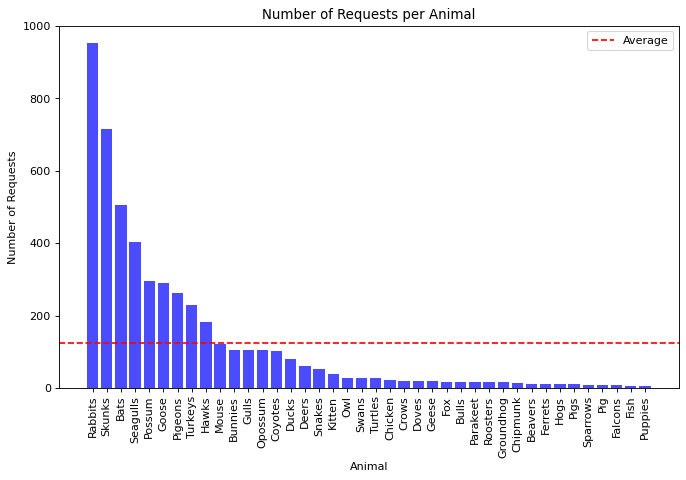

In [4]:
# from animal_requests, remove the keys that have value greater than 1000
animal_requests_filtered = {key: value for key, value in animal_requests.items() if value < 1000}
#sort the animal_requests_filtered dictionary by value
animal_requests_filtered = dict(sorted(animal_requests_filtered.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(animal_requests_filtered.keys(), animal_requests_filtered.values(), color='b', alpha=0.7)
plt.xlabel('Animal')
plt.ylabel('Number of Requests')
plt.title('Number of Requests per Animal')
plt.xticks(rotation=90)

plt.axhline(y=sum(animal_requests_filtered.values()) / len(animal_requests_filtered), color='r', linestyle='--', label='Average')
plt.legend()
plt.show()

In the previous plot, we abstractly removed every animal that has more than 1000 requests. However, a more accurate approach would be to use a logarithmic scale. This allows for a better representation of the data, especially when dealing with a wide range of values.

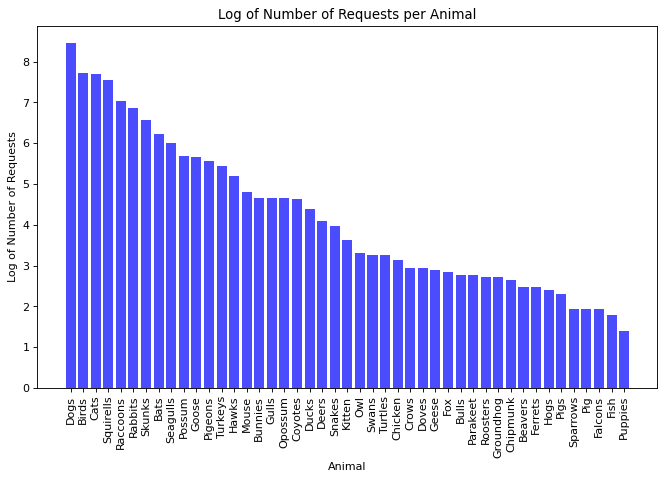

In [5]:
#take a log scale of the values
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(sorted_animal_requests.keys(), np.log(list(sorted_animal_requests.values())), color='b', alpha=0.7)
plt.xlabel('Animal')
plt.ylabel('Log of Number of Requests')
plt.title('Log of Number of Requests per Animal')
plt.xticks(rotation=90)
plt.show()

## Mid Semester Report

Let us also have a look at requests per neighborhood. First we will explore if there are requests with no neighborhood assigned.

In [6]:
print("Out of ", len(df), " requests, ", len(df[df['neighborhood'].isna()]) + len(df[df['neighborhood'] == ' ']), " do not have a neighborhood")
# make a copy of the dataframe and drop requests that do not have a neighborhood
df_neighborhood = df.dropna(subset=['neighborhood'])
df_neighborhood = df_neighborhood[df_neighborhood['neighborhood'] != ' ']

Out of  83281  requests,  263  do not have a neighborhood


In [7]:
#print distinct values of "neighborhood" column sorted by alphabetical order
sorted(df_neighborhood['neighborhood'].dropna().unique())

['Allston',
 'Allston / Brighton',
 'Back Bay',
 'Beacon Hill',
 'Boston',
 'Brighton',
 'Charlestown',
 'Chestnut Hill',
 'Dorchester',
 'Downtown / Financial District',
 'East Boston',
 'Fenway / Kenmore / Audubon Circle / Longwood',
 'Greater Mattapan',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Mission Hill',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston / South Boston Waterfront',
 'South End',
 'West Roxbury']

We will now plot the distribution of requests per neighborhood.

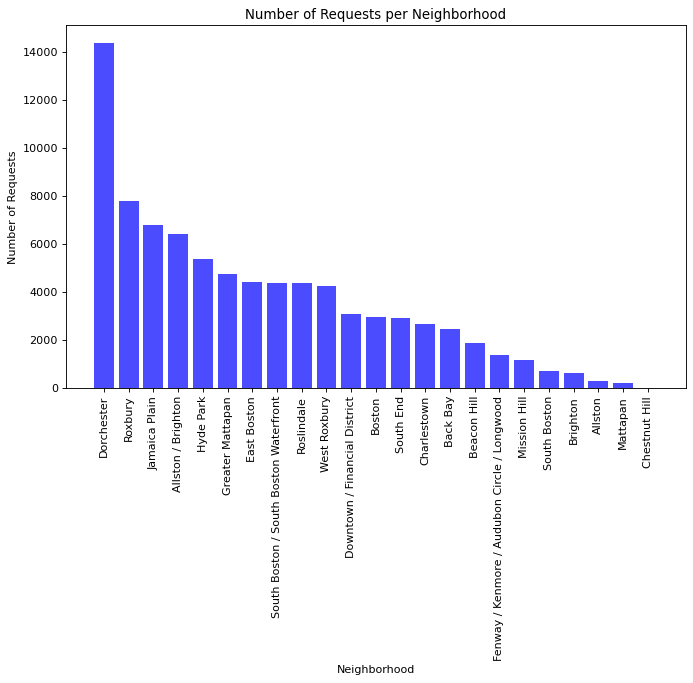

In [8]:
#plot the number of requests per neighborhood
requests_per_neighborhood = df_neighborhood['neighborhood'].value_counts()
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(requests_per_neighborhood.index, requests_per_neighborhood.values, color='b', alpha=0.7)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.title('Number of Requests per Neighborhood')
plt.xticks(rotation=90)
plt.show()

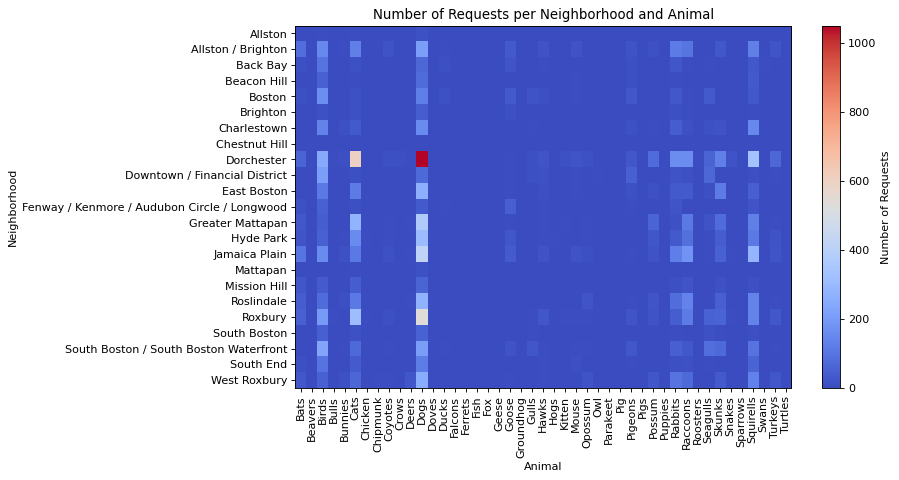

In [9]:
# heatmap of the number of requests per neighborhood and animal
requests_per_neighborhood_animal = df_neighborhood.groupby(['neighborhood', 'animal']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(requests_per_neighborhood_animal, aspect='auto', cmap='coolwarm')
plt.xlabel('Animal')
plt.ylabel('Neighborhood')
plt.title('Number of Requests per Neighborhood and Animal')
plt.xticks(range(len(requests_per_neighborhood_animal.columns)), requests_per_neighborhood_animal.columns, rotation=90)
plt.yticks(range(len(requests_per_neighborhood_animal.index)), requests_per_neighborhood_animal.index)
plt.colorbar(label='Number of Requests')
plt.show()


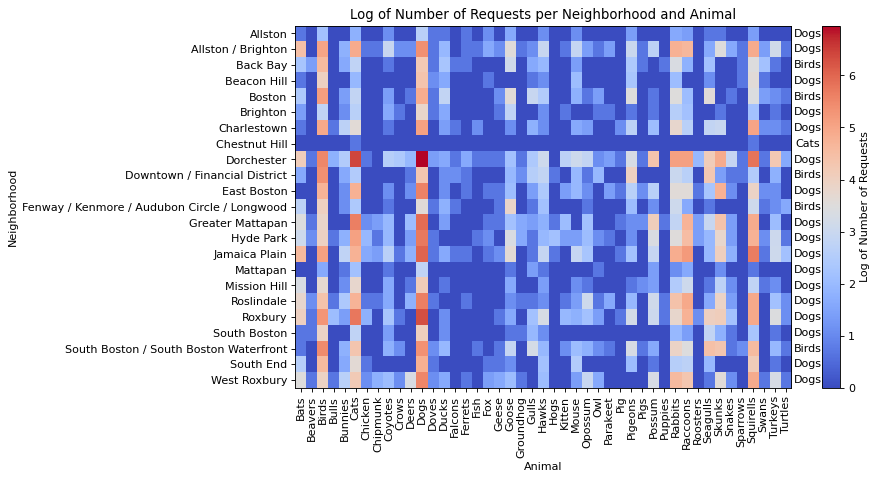

In [10]:
# make the same plot as above but with log scale and put a box at the animal with the most requests for each neighborhood
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(np.log(requests_per_neighborhood_animal + 1), aspect='auto', cmap='coolwarm')
plt.xlabel('Animal')
plt.ylabel('Neighborhood')
plt.title('Log of Number of Requests per Neighborhood and Animal')
plt.xticks(range(len(requests_per_neighborhood_animal.columns)), requests_per_neighborhood_animal.columns, rotation=90)
plt.yticks(range(len(requests_per_neighborhood_animal.index)), requests_per_neighborhood_animal.index)
plt.colorbar(label='Log of Number of Requests')

for i, neighborhood in enumerate(requests_per_neighborhood_animal.index):
    most_requests = requests_per_neighborhood_animal.loc[neighborhood].idxmax()
    plt.text(len(requests_per_neighborhood_animal.columns) +1, i, most_requests, ha='center', va='center', color='black')

plt.show()

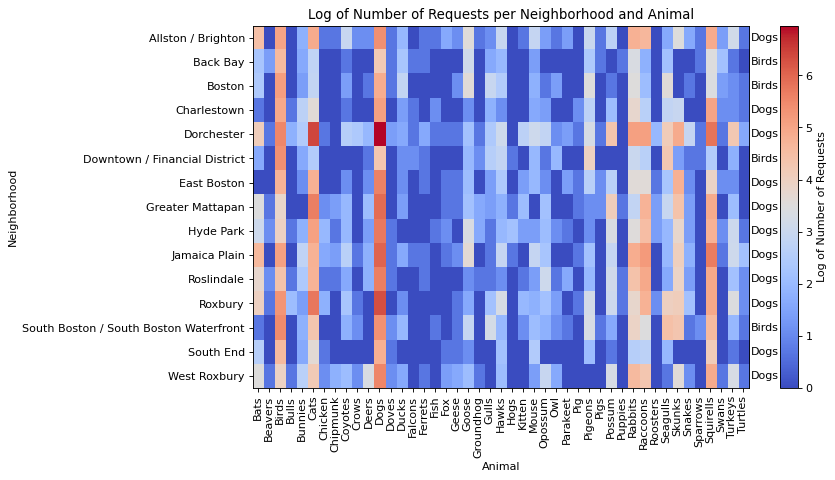

In [11]:
# do the same but only for neighborhoods with more than 2000 requests
requests_per_neighborhood = df_neighborhood['neighborhood'].value_counts()
neighborhoods = requests_per_neighborhood[requests_per_neighborhood > 2000].index
df_neighborhood = df_neighborhood[df_neighborhood['neighborhood'].isin(neighborhoods)]
requests_per_neighborhood_animal = df_neighborhood.groupby(['neighborhood', 'animal']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(np.log(requests_per_neighborhood_animal + 1), aspect='auto', cmap='coolwarm')
plt.xlabel('Animal')
plt.ylabel('Neighborhood')
plt.title('Log of Number of Requests per Neighborhood and Animal')
plt.xticks(range(len(requests_per_neighborhood_animal.columns)), requests_per_neighborhood_animal.columns, rotation=90)
plt.yticks(range(len(requests_per_neighborhood_animal.index)), requests_per_neighborhood_animal.index)
plt.colorbar(label='Log of Number of Requests')

for i, neighborhood in enumerate(requests_per_neighborhood_animal.index):
    most_requests = requests_per_neighborhood_animal.loc[neighborhood].idxmax()
    plt.text(len(requests_per_neighborhood_animal.columns) +1, i, most_requests, ha='center', va='center', color='black')

plt.show()

In [12]:
# for every neighborhood, print the most common animal
most_common_animal_per_neighborhood = requests_per_neighborhood_animal.idxmax(axis=1)
for neighborhood, animal in most_common_animal_per_neighborhood.items():
    print(f'{neighborhood}: \t{animal}')
    

Allston / Brighton: 	Dogs
Back Bay: 	Birds
Boston: 	Birds
Charlestown: 	Dogs
Dorchester: 	Dogs
Downtown / Financial District: 	Birds
East Boston: 	Dogs
Greater Mattapan: 	Dogs
Hyde Park: 	Dogs
Jamaica Plain: 	Dogs
Roslindale: 	Dogs
Roxbury: 	Dogs
South Boston / South Boston Waterfront: 	Birds
South End: 	Dogs
West Roxbury: 	Dogs
